# PROYEK ANALISIS DATA BIKE RENTAL DATASET

+ NAMA : ATSILFIA ALFATH SYAM
+ USERNAME DICODING : atsilfiaalfaths
+ EMAIL : atsilfiaalfath@gmail.com


# Pertanyaan Bisnis
+ Bagaimana pengaruh musim (season) dari tahun 2011 sampai 2012 terhadap jumlah penyewa?
+ Bagaimana pengaruh cuaca (weathersit) terhadap jumlah pengguna?
+ Rata-rata pengendara bersepeda paling tinggi pada waktu kapan?
+ aapakah terjadi peningkatan tren rental sepeda dari tahun 2011 ke 2012?
+ Bagaimana pengaruh temp, atemp, hum, windspeed pada tren rental sepeda?
+ bagaimana pengaruh musim terhadap penyewa berdasarkan pelanggan casual dan registered?

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

# 1. DATA WRANGLING

## 1.1 GATHERING DATA

### load table day

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### load table hour

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 1.2 ACCESING DATA

### 1.  day_df

_a. info day_df_

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


*2. Cek apakah ada missing data*

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

dapat dilihat bahwa tabel day_df tidak ada missing value

*3.cek duplikasi day_df*

In [7]:

print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


pada kolom dteday diubah tipe data menjadi datetime

In [16]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

## Menilai hour_df

### 2. data hour_df

*1. info hour_df*

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*Ada column yang tidak sesuai tipe datanya yaitu kolom dteday yang seharusnya menjadi datetime*


*2. cek ada data kosong*

In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

*tidak ada data yang kosong*

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


*3. cek ada data duplikasi*


In [13]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


In [ ]:
*Tidak Data duplikasi pada hour_df  *

In [ ]:
# day_df dapat dikategorykan berdasarkan data tersebut, namun pada kolom weathersit hanya terdapat 3 musim

In [18]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

*pedoman kategory hour_df, pada weathersit terdapat 4 kategori*. data ini berbeda dengan day_df yang hanya memiliki 3 weathersit


jika ditelaah lebih dalam, ditemukan weathersit kategori 4 pada hour_df pada waktu:


+ 26/01/2011 pada hr :16
+ 09/01/2012 pada hr : 18
+ 21/01/2012 pada hr : 1

In [17]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## 1.3 CLEANING DATA

#### 1. Memperbaiki data day_df kolom tdatey

In [19]:

datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [110]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

*Kolom datetime telah diperbaiki data typenya*

### 2. Memperbaiki tipe data hour_df

*karena terdapat kesalahan tipe data pada kolom dteday ,maka tipe data dteday diperbaiki menjadi datetime*

In [20]:

datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

*nah sudah berhasil memperbaiki tipe data dteday*

In [21]:
#Rename kolom agar tidak menimbulkan keliru pembacaan tabel

day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'total_count_user'
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count_user
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
# tambah kolom day name untuk dari index weekday, ini berfungsi untuk memudahkan sort value. dan tetap tidak menghapus weekday
weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
day_df['day_name'] = day_df['weekday'].apply(lambda x: weekday_mapping[x])

In [113]:
day_df.sample(5)

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count_user,day_name
613,614,2012-09-05,3,1,9,0,3,1,1,0.736667,0.708983,0.741250,0.187808,832,6280,7112,Wednesday
513,514,2012-05-28,2,1,5,1,1,0,1,0.712500,0.679300,0.676250,0.196521,2557,3486,6043,Monday
686,687,2012-11-17,4,1,11,0,6,0,1,0.325000,0.326383,0.545417,0.179729,1313,4316,5629,Saturday
363,364,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999,Friday
603,604,2012-08-26,3,1,8,0,0,0,2,0.653333,0.595996,0.845833,0.228858,1483,3772,5255,Sunday


In [23]:
# Mengubah kategori angka ke keterangan pada kolom year, month, season, weekday, weathersit

day_df['year'] = day_df['year'].map({
    0: 2011,
    1: 2012,
})
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain'
})


In [122]:
day_df.sample(5)

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count_user,day_name
162,163,2011-06-12,Summer,2011,Jun,0,0,0,Clear/Partly Cloudy,0.692500,0.643325,0.747917,0.163567,1467,2993,4460,Sunday
571,572,2012-07-25,Fall,2012,Jul,0,3,1,Clear/Partly Cloudy,0.724167,0.654054,0.450000,0.164800,1383,6790,8173,Wednesday
451,452,2012-03-27,Summer,2012,Mar,0,2,1,Clear/Partly Cloudy,0.323333,0.315654,0.290000,0.187192,531,4571,5102,Tuesday
321,322,2011-11-18,Winter,2011,Nov,0,5,1,Clear/Partly Cloudy,0.274167,0.272721,0.410000,0.168533,245,3147,3392,Friday
273,274,2011-10-01,Winter,2011,Oct,0,6,0,Misty/Cloudy,0.410000,0.412863,0.753750,0.292296,480,1949,2429,Saturday


In [24]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dateday           731 non-null    datetime64[ns]
 2   season            731 non-null    object        
 3   year              731 non-null    int64         
 4   month             731 non-null    object        
 5   holiday           731 non-null    int64         
 6   weekday           731 non-null    int64         
 7   workingday        731 non-null    int64         
 8   weathersit        731 non-null    object        
 9   temp              731 non-null    float64       
 10  atemp             731 non-null    float64       
 11  hum               731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual            731 non-null    int64         
 14  registered        731 non-

In [27]:
# Mengubah tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['day_name'] = day_df.day_name.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [35]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dateday           731 non-null    datetime64[ns]
 2   season            731 non-null    category      
 3   year              731 non-null    category      
 4   month             731 non-null    category      
 5   holiday           731 non-null    category      
 6   weekday           731 non-null    int64         
 7   workingday        731 non-null    category      
 8   weathersit        731 non-null    category      
 9   temp              731 non-null    float64       
 10  atemp             731 non-null    float64       
 11  hum               731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual            731 non-null    int64         
 14  registered        731 non-

In [ ]:
# simpan day df ke real_day_df

In [33]:
#simpan data day yang telah diperbaiki
day_df.to_csv("data/real_day.csv", index=False)

rent_day_df = pd.read_csv("data/real_day.csv")
rent_day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count_user,day_name
0,1,2011-01-01,Spring,2011,Jan,0,6,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2,2011-01-02,Spring,2011,Jan,0,0,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday
2,3,2011-01-03,Spring,2011,Jan,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday
3,4,2011-01-04,Spring,2011,Jan,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
4,5,2011-01-05,Spring,2011,Jan,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday


ubah tipe data

In [40]:
rent_day_df["dateday"] = pd.to_datetime(rent_day_df["dateday"])



In [42]:
rent_day_df['season'] = rent_day_df.season.astype('category')
rent_day_df['year'] = rent_day_df.year.astype('category')
rent_day_df['month'] = rent_day_df.month.astype('category')
rent_day_df['holiday'] = rent_day_df.holiday.astype('category')
rent_day_df['day_name'] = rent_day_df.day_name.astype('category')
rent_day_df['workingday'] = rent_day_df.workingday.astype('category')
rent_day_df['weathersit'] = rent_day_df.weathersit.astype('category')

# 2. Exploratory Data Analysis

## 1. Table day_df

In [44]:
rent_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dateday           731 non-null    datetime64[ns]
 2   season            731 non-null    category      
 3   year              731 non-null    category      
 4   month             731 non-null    category      
 5   holiday           731 non-null    category      
 6   weekday           731 non-null    int64         
 7   workingday        731 non-null    category      
 8   weathersit        731 non-null    category      
 9   temp              731 non-null    float64       
 10  atemp             731 non-null    float64       
 11  hum               731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual            731 non-null    int64         
 14  registered        731 non-

In [45]:
monthly_day_df = rent_day_df.resample(rule='M', on='dateday').agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "total_count_user": "sum"
})
monthly_day_df.index = monthly_day_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_day_df = monthly_day_df.reset_index()
monthly_day_df.rename(columns={
    "instant": "count_id",
}, inplace=True)
monthly_day_df.head()

,dateday,count_id,casual,registered,total_count_user
0,January,31,3073,35116,38189
1,February,28,6242,41973,48215
2,March,31,12826,51219,64045
3,April,30,22346,72524,94870
4,May,31,31050,104771,135821


In [47]:
monthly_day_df.sample(24)

,dateday,count_id,casual,registered,total_count_user
1,February,28,6242,41973,48215
4,May,31,31050,104771,135821
13,February,29,8721,94416,103137
9,October,31,25222,98289,123511
8,September,30,26545,100873,127418
19,August,31,43197,171306,214503
21,October,31,34538,164303,198841
3,April,30,22346,72524,94870
15,April,30,38456,135768,174224
5,June,30,30612,112900,143512


In [48]:
group_ym = day_df.groupby(by=["year", "month"]).agg({
    "total_count_user": ['max', 'min', 'mean', 'sum'],
})
group_ym

C:\Users\atsil\AppData\Local\Temp\ipykernel_9848\1142079345.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_ym = day_df.groupby(by=["year", "month"]).agg({


total_count_user                           
                        max   min         mean     sum
year month                                            
2011 Apr               5312   795  3162.333333   94870
     Aug               5895  1115  4409.387097  136691
     Dec               3940   705  2816.870968   87323
     Feb               2927  1005  1721.964286   48215
     Jan               1985   431  1231.903226   38189
     Jul               6043  3285  4559.387097  141341
     Jun               5515  3767  4783.733333  143512
     Mar               3239   605  2065.967742   64045
     May               5805  2633  4381.322581  135821
     Nov               4486  1495  3405.566667  102167
     Oct               5511   627  3984.225806  123511
     Sep               5423  1842  4247.266667  127418
2012 Apr               7460  1027  5807.466667  174224
     Aug               7865  4549  6919.451613  214503
     Dec               6606   441  3990.741935  123713
     Feb               5062  1529  3556.448276  103137
     Jan               4521  1301  3120.774194   96744
     Jul               8173  4459  6567.967742  203607
     Jun               8120  4127  6761.000000  202830
     Mar               8362  3194  5318.548387  164875
     May               8294  2843  6318.225806  195865
     Nov               6852  2277  5088.800000  152664
     Oct               8156    22  6414.225806  198841
     Sep               8714  4073  7285.766667  218573

*Dapat diperhatikan pada data ini dibedakan berdasarkan tahun dan bulan*

In [50]:
group_by_year_day_df = day_df.groupby(by="year").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "total_count_user": "sum"
}).sort_values(by="year", ascending=True)
group_by_year_day_df

C:\Users\atsil\AppData\Local\Temp\ipykernel_9848\3783425379.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_year_day_df = day_df.groupby(by="year").agg({


,instant,casual,registered,total_count_user
year,,,,
2011,365,247252,995851,1243103
2012,366,372765,1676811,2049576


*Group berdasarkan tahun*

In [51]:
group_by_weathersit_day_df= day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "total_count_user": "sum"
}).sort_values(by="weathersit", ascending=False)
group_by_weathersit_day_df

C:\Users\atsil\AppData\Local\Temp\ipykernel_9848\1027548271.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_weathersit_day_df= day_df.groupby(by="weathersit").agg({


,casual,registered,total_count_user
weathersit,,,
Misty/Cloudy,169776,827082,996858
Light Snow/Rain,3895,33974,37869
Clear/Partly Cloudy,446346,1811606,2257952


*berdasarkan cuaca*

In [52]:
group_by_season_day_df = day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "total_count_user": "sum"
}).sort_values(by="season", ascending=False)

group_by_season_day_df

C:\Users\atsil\AppData\Local\Temp\ipykernel_9848\1749552967.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_season_day_df = day_df.groupby(by="season").agg({


,casual,registered,total_count_user
season,,,
Winter,129782,711831,841613
Summer,203522,715067,918589
Spring,60622,410726,471348
Fall,226091,835038,1061129


*day_df berdasarkan season*

C:\Users\atsil\AppData\Local\Temp\ipykernel_9848\389966399.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


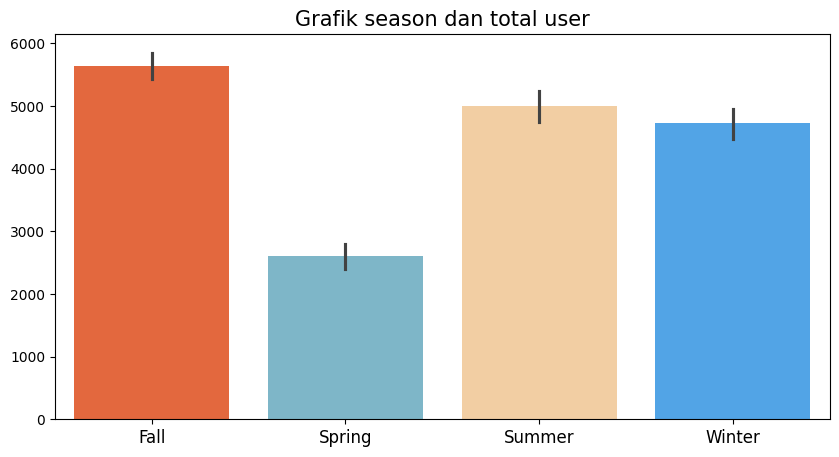

In [57]:
plt.figure(figsize=(10, 5))
colors_ = ["#FF5B22", "#72BCD4", "#FFCF96", "#39A7FF"]

sns.barplot(
    y="total_count_user", 
    x="season",
    data=rent_day_df.sort_values(by="season", ascending=False),
    palette=colors_
)
plt.title("Grafik season dan total user", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [64]:
group_by_weekday_day_df = rent_day_df.groupby(by=["day_name"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_count_user": "sum"
}).sort_values(by="day_name", ascending=True)

group_by_weekday_day_df

C:\Users\atsil\AppData\Local\Temp\ipykernel_9848\1833194639.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_weekday_day_df = rent_day_df.groupby(by=["day_name"]).agg({


,casual,registered,total_count_user
day_name,,,
Friday,78238,409552,487790
Monday,70784,384719,455503
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Thursday,61460,423935,485395
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048


C:\Users\atsil\AppData\Local\Temp\ipykernel_9848\1574978530.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


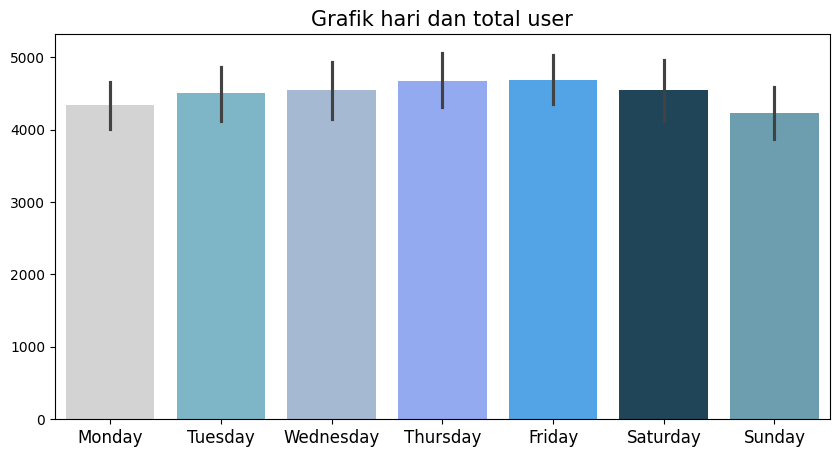

In [73]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#9EB8D9", "#83A2FF","#39A7FF", "#164863","#61A3BA"]
# order day
days_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]
grouped = grouped.reindex(days_order)
sns.barplot(
    y="total_count_user", 
    x="day_name",
    data= rent_day_df.sort_values(by=["weekday"], ascending=True),
    palette=colors_,
    order=days_order
)
plt.title("Grafik hari dan total user", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()